In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Utah_County_Sheriff_s_Office.csv', 
                 parse_dates=["incident_datetime"],
                 infer_datetime_format=True, usecols=["incident_type_primary","city","latitude","longitude","incident_datetime","parent_incident_type"])
eagle = df[df['city']=="EAGLE MOUNTAIN"]
eagle.dtypes

incident_datetime        datetime64[ns]
incident_type_primary            object
city                             object
latitude                        float64
longitude                       float64
parent_incident_type             object
dtype: object

In [3]:
eagle.sort_values("incident_datetime").head()

,incident_datetime,incident_type_primary,city,latitude,longitude,parent_incident_type
12709,2008-03-29,Community Policing,EAGLE MOUNTAIN,40.30744,-112.00943,Proactive Policing
12710,2008-03-29,Community Policing,EAGLE MOUNTAIN,40.33309,-112.01421,Proactive Policing
12712,2008-03-29,Traffic,EAGLE MOUNTAIN,40.38468,-111.94985,Traffic
12713,2008-03-29,Community Policing,EAGLE MOUNTAIN,40.30543,-112.00576,Proactive Policing
12721,2008-03-29,Traffic,EAGLE MOUNTAIN,40.37757,-112.00396,Traffic


In [4]:
eagle.parent_incident_type.value_counts()

Community Policing            5936
Proactive Policing            3800
Other                         2837
Traffic                       2176
Alarm                         1652
Theft                         1480
Family Offense                 902
Assault                        547
Property Crime                 380
Drugs                          282
Missing Person                 203
Quality of Life                186
Other Sexual Offense           177
Breaking & Entering            165
Disorder                       156
Liquor                         131
Property Crime Residential     127
Sexual Offense                  52
Weapons Offense                 22
Sexual Assault                  15
Assault with Deadly Weapon      13
Death                           12
Homicide                         1
Name: parent_incident_type, dtype: int64

## Property Crimes in Eagle Mountain

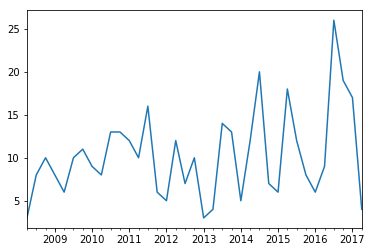

In [5]:
theft_times = eagle[eagle.parent_incident_type=='Property Crime'].incident_datetime.values
thefts = pd.Series([1]*len(theft_times), index=theft_times)
thefts_by_mo = thefts.resample('3M').sum()
thefts_by_mo.plot()

## Property Crime in Utah County Sheriff Data

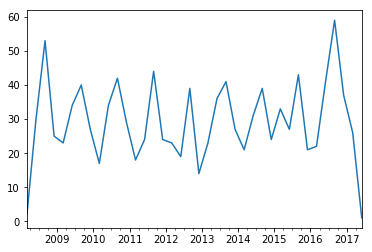

In [6]:
theft_times = df[df.parent_incident_type=='Property Crime'].incident_datetime.values
thefts = pd.Series([1]*len(theft_times), index=theft_times)
thefts_by_mo = thefts.resample('3M').sum()
thefts_by_mo.plot()

In [7]:
eagle.incident_type_primary.value_counts()

Community Policing                3800
CITIZEN ASSIST                    2275
ANIMAL PROBLEM                    1921
ALARM                             1652
Other                              840
Alarm                              817
Traffic                            586
FAMILY PROBLEM-NO VIOLENCE         525
TRAFFIC ACCIDENT-REPORTABLE        524
Theft                              454
TRAFFIC OFFENSE                    451
SUSPICIOUS                         448
CRIMINAL MISCHIEF                  443
Assault                            417
Family Offense                     367
THEFT-PROPERTY-OTHER               346
ANIMAL STRAY                       322
AGENCY ASSIST                      243
THEFT-PROPERTY-FROM MOTOR VEHI     224
TRAFFIC ACCIDENT-NON REPORTABL     218
FRAUD                              215
DRIVING UNDER INFLUENCE            211
MISSING PERSON                     203
ANIMAL BITE                        157
DISORDERLY CONDUCT                 156
PROPERTY-FOUND           

In [8]:
eagle[eagle.incident_type_primary == "THEFT-PROPERTY-FROM MOTOR VEHI"].to_csv("thefts_from_vehicles.csv", index=False, columns=["incident_datetime","latitude","longitude"])

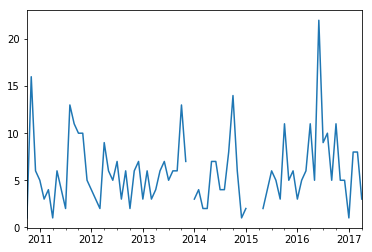

In [9]:
theft_times = df[df.incident_type_primary=="THEFT-PROPERTY-FROM MOTOR VEHI"].incident_datetime.values
thefts = pd.Series([1]*len(theft_times), index=theft_times)
thefts_by_mo = thefts.resample('1M').sum()
thefts_by_mo.plot()

In [19]:
from scipy import stats


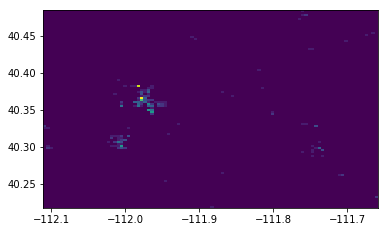

In [64]:

em_thefts = df[df.incident_type_primary=="THEFT-PROPERTY-FROM MOTOR VEHI"][['latitude', 'longitude']]
et = em_thefts[(np.abs(stats.zscore(em_thefts)) < .12501).all(axis=1)]
x = et.latitude.values
y = et.longitude.values
heatmap, xedges, yedges = np.histogram2d(y, x, bins=100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

In [77]:
i, j = np.unravel_index(heatmap.argmax(), heatmap.shape)
yedges[j:j+1]
#"https://www.google.com/maps?daddr=%s,%s" % (np.mean([yedges[j:j+1]]), np.mean([xedges[i:i+1]])

array([ 40.36444825])